In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from tqdm import tqdm, trange
import operator
import random
print(random.randint(0,10))

0


In [15]:
bank = pd.read_csv('data/bank-additional-full.csv',sep=',')
bank['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [4]:
bank_client = bank.iloc[:,0:7]
print(bank_client['job'].unique())

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


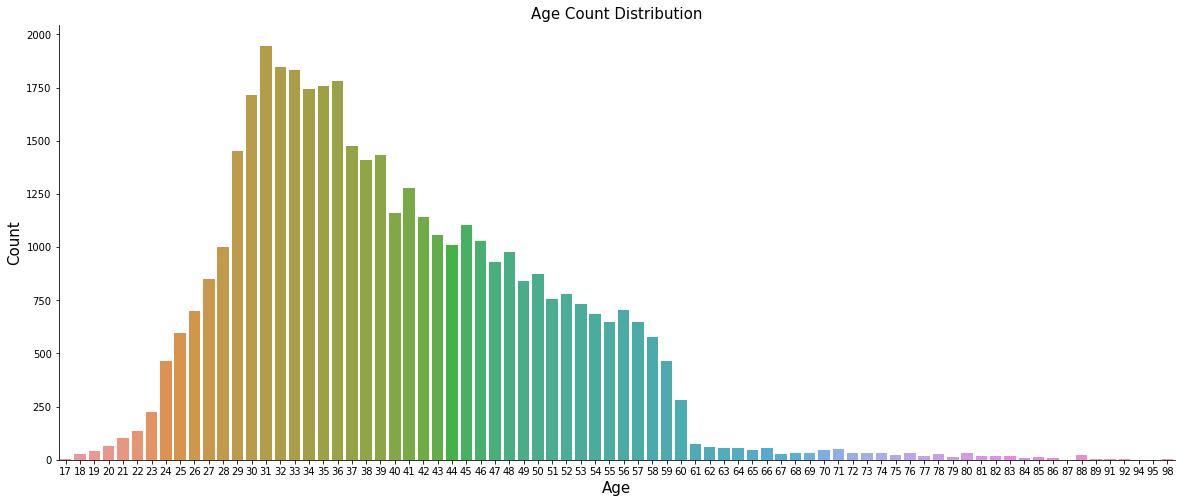

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = bank_client)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()


In [6]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


In [7]:
bank_client = bank.iloc[:,0:7]
print(bank_client['job'].unique().shape)
print(np.arange(1,bank_client['job'].unique().shape[0]+1))
bank_client['job'].replace(bank_client['job'].unique(), np.arange(1,bank_client['job'].unique().shape[0]+1), inplace=True)
print(bank_client.shape)
bank_client.head()


(12,)
[ 1  2  3  4  5  6  7  8  9 10 11 12]
(41188, 7)


,age,job,marital,education,default,housing,loan
0,56,1,married,basic.4y,no,no,no
1,57,2,married,high.school,unknown,no,no
2,37,2,married,high.school,no,yes,no
3,40,3,married,basic.6y,no,no,no
4,56,2,married,high.school,no,no,yes


# 对string类型的标签进行编码

In [18]:
def Encoder_X(data):
    Attribute_Array = np.array(['age','job','marital','education','default','housing','loan','contact','month','day_of_week','campaign','pdays','previous','poutcome'])
    for i in range(0,Attribute_Array.shape[0]):
        data[Attribute_Array[i]].replace(data[Attribute_Array[i]].unique(), np.arange(1,data[Attribute_Array[i]].unique().shape[0]+1), inplace=True)
    data['y'].replace(['yes','no'],[1,-1],inplace=True)
    return data
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4
           
    return dataframe
bank = pd.read_csv('data/bank-additional-full.csv',sep=',')
encoder_bank = Encoder_X(bank)
encoder_bank = age(encoder_bank)
all_value = encoder_bank.values
encoder_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1.1,93.994,-36.4,4.857,5191.0,-1
1,1,2,1,2,2,1,1,1,1,1,...,1,1,1,1,1.1,93.994,-36.4,4.857,5191.0,-1
2,1,2,1,2,1,2,1,1,1,1,...,1,1,1,1,1.1,93.994,-36.4,4.857,5191.0,-1
3,1,3,1,3,1,1,1,1,1,1,...,1,1,1,1,1.1,93.994,-36.4,4.857,5191.0,-1
4,1,2,1,2,1,1,2,1,1,1,...,1,1,1,1,1.1,93.994,-36.4,4.857,5191.0,-1


In [20]:
bank_data_noDuration = np.delete(all_value,10,axis=1)
for i in range(0,bank_data_noDuration.shape[1]):
    data = bank_data_noDuration[:,i]
    print("col:{:d},max:{:.2f},min:{:.2f}".format(i,np.max(data),np.min(data)))

col:0,max:4.00,min:1.00
col:1,max:12.00,min:1.00
col:2,max:4.00,min:1.00
col:3,max:8.00,min:1.00
col:4,max:3.00,min:1.00
col:5,max:3.00,min:1.00
col:6,max:3.00,min:1.00
col:7,max:2.00,min:1.00
col:8,max:10.00,min:1.00
col:9,max:5.00,min:1.00
col:10,max:42.00,min:1.00
col:11,max:27.00,min:1.00
col:12,max:8.00,min:1.00
col:13,max:3.00,min:1.00
col:14,max:1.40,min:-3.40
col:15,max:94.77,min:92.20
col:16,max:-26.90,min:-50.80
col:17,max:5.04,min:0.63
col:18,max:5228.10,min:4963.60
col:19,max:1.00,min:-1.00


In [10]:
#define Kernel function 
def K_linear(x1,x2):
    return np.dot(x1,x2.T)[0,0]
a = np.mat(np.array([1,2,4,2,4,6,9,3,10,12,1,23,2]))
c1 = np.argwhere(a<4)[:,1]
c2 = np.argwhere((a>=4)&(a<=10))[:,1]
c3 = np.argwhere(a>10)[:,1]
d = [c1,c2,c3]
def get_ai_list(data,a,b,C):
    list_a = []
    y_all = data[:,-1]
    c1 = np.argwhere(a==0)[:,0]
    c2 = np.argwhere((a>0)&(a<C))[:,0]
    c3 = np.argwhere(a==C)[:,0]
    for i in c2:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if abs(y_all[i]*y_hat-1)>1e-3:
            list_a.append(i)
    for i in c1:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i]*y_hat<1-1e-3:
            list_a.append(i)
    for i in c3:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i]*y_hat>1+1e-3:
            list_a.append(i)
    
    return list_a
def jud_KKT(data,a,b,i,C):
    y_all = data[:,-1]
    y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
    temp = y_all[i]*y_hat
    ai = a[i]
    if (temp==1) & ((ai>0)&(ai<C)) or (temp<1) &(ai==0) or (temp>1)&(ai==C):
        return True
    else:
        return False

In [166]:
start_time = time.time()
def cal_E(data_set,a,i,b):
    y = data_set[:,-1]
    y_hat = np.dot(np.dot(np.multiply(a,y).T,bd[:,0:-1]),bd[i,0:-1].T)+b
    
    return (y_hat-y[i])[0,0]
bd = np.mat(bank_data_noDuration)
a = np.mat(np.zeros((bd.shape[0],1)))
b = 0
max_iteration = 100
iter_index = 0
C=0.6
def select_i(data,C,a,b):
    y_all = data[:,-1]
    # in_0_C = a[(a<C)&(a>0)]
    # eq_C = a[a==C]
    # eq_0 = a[a==0]
    c1 = np.argwhere(a==0)[:,1]
    c2 = np.argwhere((a>0)&(a<C))[:,1]
    c3 = np.argwhere(a==C)[:,1]
    for i in c2:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if abs(y_all[i]*y_hat-1)>1e-3:
            return c2[i]
    for i in c1:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i]*y_hat<1:
            return c1[i]
    for i in c3:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i]*y_hat>1:
            return c3[i]
    
    return -1


def select_j(data,a,i,b):
    y = data[:,-1]
    w = np.dot(np.multiply(a,y).T,data[:,0:-1]).T
    all_E = np.dot(w.T,bd[:,0:-1].T)-y.T
    return np.argmax(np.abs(all_E-cal_E(bd,a,i,b)))
def bound(uc,L,H):
    if uc>H:
        return H
    elif uc<L:
        return L
    else:
        return uc

label = bd[:,-1]
while iter_index <= max_iteration:
    iter_index+=1
    index_i = select_i(bd,C,a,b)
    if index_i == -1:
        print("finished!")
    else :
        for kk in range(0,bd.shape[0]):
            #i = index_i
            i = kk
            j = select_j(bd,a,i,b)
            print(j)
            ai = a[i,0]
            aj = a[j,0]
            yi = label[i,0]
            yj = label[i,0]
            Kii = K_linear(bd[i,0:-1],bd[i,0:-1])
            Kij = K_linear(bd[i,0:-1],bd[j,0:-1])
            Kjj = K_linear(bd[j,0:-1],bd[j,0:-1])
            H = 0
            L = 0
            if label[i]!=label[j]:
                L=max(0,aj-ai)
                H=min(C,C+aj-ai)
            else:
                L=max(0,ai-aj-C)
                H=min(C,ai-aj)
            Ei = cal_E(bd,a,i,b)
            Ej = cal_E(bd,a,j,b)
            eta = K_linear(bd[i,0:-1],bd[i,0:-1])+K_linear(bd[j,0:-1],bd[j,0:-1])-2*K_linear(bd[i,0:-1],bd[j,0:-1])
            aj_new_uc = (aj+label[j]*(Ei-Ej)/eta)[0,0]
            aj_new = bound(aj_new_uc,L,H)
            ai_new = ai+yi*yj*(aj-aj_new)
            b1_new = -Ei-yi*Kii*(ai_new-ai)-yj*Kij*(aj_new-aj)+b
            b2_new = -Ej-yi*Kii*(ai_new-ai)-yj*Kjj*(aj_new-aj)+b
            b_new = (b1_new+b2_new)/2
            b = b_new
            a[i] = ai_new
            a[j] = aj_new


end_time = time.time()
print("totally cost {:.2f} S!".format(end_time-start_time))  




75
40830
11769
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
13447
totally cost 0.69 S!


In [79]:
def get_ai_list(data,a,b,C):
    list_a = []
    y_all = data[:,-1]
    c1 = np.argwhere(a==0)[:,0]
    c2 = np.argwhere((a>0)&(a<C))[:,0]
    c3 = np.argwhere(a==C)[:,0]
    for i in c2:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if abs(y_all[i,0]*y_hat[0,0]-1)>1e-3:
            list_a.append(i)
    for i in c1:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i,0]*y_hat[0,0]<1-1e-3:
            list_a.append(i)
    for i in c3:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i,0]*y_hat[0,0]>1+1e-3:
            list_a.append(i)
    
    return list_a

In [27]:
bd_all = np.mat(bank_data_noDuration)
index = []
bd = bd_all[0:4000,[0,1,2,4,5,6,7,8,9,-1]].copy()
new_bd = bd_all[:,[0,1,2,4,5,6,7,8,9,-1]].copy()
bd_yes = new_bd[np.argwhere(new_bd[:,-1]==1)[:,0],:]
bd_no = new_bd[np.argwhere(new_bd[:,-1]==-1)[:,0],:]
print(bd_yes.shape)
print(bd_no.shape)
blance_data = np.mat(np.zeros((4000,10),dtype=np.float32))
for i in range(0,4000):
    if i%2==0:
        blance_data[i,:] = bd_yes[i,:]
    else:
        blance_data[i,:] = bd_no[i,:]
print(blance_data.shape) 
#cc = get_ai_list(blance_data,a,b,C)
print(blance_data[68,:])

(4640, 10)
(36548, 10)
(4000, 10)
[[ 1. 12.  1.  1.  2.  1.  1.  1.  3.  1.]]


In [28]:
b = 1
a = b
print(a)
b = 2
print(a)

1
1


In [24]:
start_time = time.time()
def cal_E(data_set,a,i,b):
    y = data_set[:,-1]
    y_hat = np.dot(np.dot(np.multiply(a,y).T,bd[:,0:-1]),bd[i,0:-1].T)+b
    return (y_hat-y[i])[0,0]
a = np.mat(np.zeros((bd.shape[0],1)))
b = 0
max_iteration = 30
iter_index = 0
C=0.4
def select_i(data,C,a,b):
    y_all = data[:,-1]
    # in_0_C = a[(a<C)&(a>0)]
    # eq_C = a[a==C]
    # eq_0 = a[a==0]
    c1 = np.argwhere(a==0)[:,1]
    c2 = np.argwhere((a>0)&(a<C))[:,1]
    c3 = np.argwhere(a==C)[:,1]
    for i in c2:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if abs(y_all[i]*y_hat-1)>1e-3:
            return c2[i]
    for i in c1:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i]*y_hat<1:
            return c1[i]
    for i in c3:
        y_hat=np.dot(np.dot(np.multiply(a,y_all).T,data[:,0:-1]),data[i,0:-1].T)+b
        if y_all[i]*y_hat>1:
            return c3[i]
    
    return -1




def select_j(data,a,i,b):
    y = data[:,-1]
    w = np.dot(np.multiply(a,y).T,data[:,0:-1])
    all_E = np.dot(w,bd[:,0:-1].T)-y.T+b
    return np.argmax(np.abs(all_E-cal_E(bd,a,i,b)))

def bound(uc,L,H):
    if uc>H:
        return H
    elif uc<L:
        return L
    else:
        return uc
def compare_list(ls1,ls2):
    ls1 = sorted(ls1)
    ls2 = sorted(ls2)
    return operator.eq(ls1,ls2)
label = bd[:,-1]
max_iteration = 10
store_old_ailist = []
list_ai = []
kc = 0
bc = 0
isAll = True
for iter_process in trange(max_iteration):
    store_old_ailist = list_ai.copy()
    list_ai = get_ai_list(bd,a,b,C)
    if len(list_ai) == 0:
        print("finished!")
        break
    else :
        #全集遍历
        tt = True
        if isAll:
            
            for kk in range(0,bd.shape[0]):
                #i = index_i
                if jud_KKT(bd,a,b,kk,C):
                    i = kk
                    j = select_j(bd,a,i,b)
                    ai = a[i,0]
                    aj = a[j,0]
                    yi = label[i,0]
                    yj = label[j,0]
                    Kii = K_linear(bd[i,0:-1],bd[i,0:-1])
                    Kij = K_linear(bd[i,0:-1],bd[j,0:-1])
                    Kjj = K_linear(bd[j,0:-1],bd[j,0:-1])
                    H = 0
                    L = 0
                    if label[i]!=label[j]:
                        L=max(0,aj-ai)
                        H=min(C,C+aj-ai)
                    else:
                        L=max(0,ai-aj-C)
                        H=min(C,ai-aj)
                    Ei = cal_E(bd,a,i,b)
                    Ej = cal_E(bd,a,j,b)
                    eta = K_linear(bd[i,0:-1],bd[i,0:-1])+K_linear(bd[j,0:-1],bd[j,0:-1])-2*K_linear(bd[i,0:-1],bd[j,0:-1])
                    if eta==0:
                        print("eta=0")
                        print(i,j)
                        print(select_j(bd,a,i,b))
                        kc = a.copy()
                        bc = b.copy()
                    aj_new_uc = (aj+label[j]*(Ei-Ej)/eta)[0,0]
                    aj_new = bound(aj_new_uc,L,H)
                    ai_new = ai+yi*yj*(aj-aj_new)
                    b1_new = -Ei-yi*Kii*(ai_new-ai)-yj*Kij*(aj_new-aj)+b
                    b2_new = -Ej-yi*Kij*(ai_new-ai)-yj*Kjj*(aj_new-aj)+b
                    b_new = (b1_new+b2_new)/2
                    b = b_new
                    a[i] = ai_new
                    a[j] = aj_new
                    isAll = False
                    if tt:
                        print(eta,b1_new,b2_new)
                        tt = False

            
        else :
            arg_bound = np.argwhere((a>0)&(a<C))[:,0]
            for kk in arg_bound:
                if jud_KKT(bd,a,b,kk,C):
                    i = kk
                    j = select_j(bd,a,i,b)
                    ai = a[i,0]
                    aj = a[j,0]
                    yi = label[i,0]
                    yj = label[j,0]
                    Kii = K_linear(bd[i,0:-1],bd[i,0:-1])
                    Kij = K_linear(bd[i,0:-1],bd[j,0:-1])
                    Kjj = K_linear(bd[j,0:-1],bd[j,0:-1])
                    H = 0
                    L = 0
                    if label[i]!=label[j]:
                        L=max(0,aj-ai)
                        H=min(C,C+aj-ai)
                    else:
                        L=max(0,ai-aj-C)
                        H=min(C,ai-aj)
                    Ei = cal_E(bd,a,i,b)
                    Ej = cal_E(bd,a,j,b)
                    eta = K_linear(bd[i,0:-1],bd[i,0:-1])+K_linear(bd[j,0:-1],bd[j,0:-1])-2*K_linear(bd[i,0:-1],bd[j,0:-1])
                    if eta==0:
                        print("eta=0")
                        print(i,j)
                        print(select_j(bd,a,i,b))
                        kc = a.copy()
                        bc = b.copy()
                    aj_new_uc = (aj+label[j]*(Ei-Ej)/eta)[0,0]
                    aj_new = bound(aj_new_uc,L,H)
                    ai_new = ai+yi*yj*(aj-aj_new)
                    b1_new = -Ei-yi*Kii*(ai_new-ai)-yj*Kij*(aj_new-aj)+b
                    b2_new = -Ej-yi*Kij*(ai_new-ai)-yj*Kjj*(aj_new-aj)+b
                    b_new = (b1_new+b2_new)/2
                    b = b_new
                    a[i] = ai_new
                    a[j] = aj_new
                    isAll = True
                    if tt:
                        print(eta,b1_new,b2_new)
                        tt = False


           
            

end_time = time.time()
print("totally cost {:.2f} S!".format(end_time-start_time))  

  0%|          | 0/10 [00:00<?, ?it/s]


NameError: name 'get_ai_list' is not defined

In [13]:
#evaluate model
test = bd[0:40000,:]
def eva_model(a,b,test_set,train_set):
    y = train_set[:,-1]
    test_label = test_set[:,-1].T
    w = np.dot(np.multiply(a,y).T,train_set[:,0:-1])
    yy = np.dot(w,test_set[:,0:-1].T)+b
    yy[np.where(yy>=0)] = 1
    yy[np.where(yy<0)] = -1
    print(np.argwhere(yy==-1).shape)
    acc = np.sum(np.abs(yy+test_label),axis=1)[0,0]
    return acc/test_set.shape[0]/2
print(eva_model(a,b,test,bd))
print(np.argwhere(test[:,-1]==-1).shape)
#print(len(get_ai_list(bd,a,b,C)))

(340, 2)
0.10875
(3889, 2)


In [83]:
bd = blance_data
x1 = bd[1,0:-1]
x2 = bd[2,0:-1]

y = bd[:,-1]
w = np.dot(np.multiply(a,y).T,bd[:,0:-1])
ay = np.multiply(a,y)
y_hat = np.dot(np.dot(np.multiply(a,y).T,bd[:,0:-1]),bd[1,0:-1].T)+b
#w1 = ay*bd[:,0:-1]
print(ay.shape)
print(w.shape)
print(y.shape)

(4000, 4000)
(4000, 9)
(4000,)


In [49]:
print(1==1.0)

True
